### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel

In [1]:
from covid_top import *
%matplotlib inline

Start importing World-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/
Start importing USA-data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports_us/
Start importing single data  ./data/COVID-19/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv
Start importing single data  ./data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv


### Number of covid-19 outbreak days 

In [2]:
rcParams['figure.figsize'] = 20, 6
len(data)

403

In [3]:
updated_date=files[-1].split('.')[0]
updated_date

'02-27-2021'

In [4]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  74939585.0


### New Recovered in the World changed by day

('Last day Increasing', 303834.0)

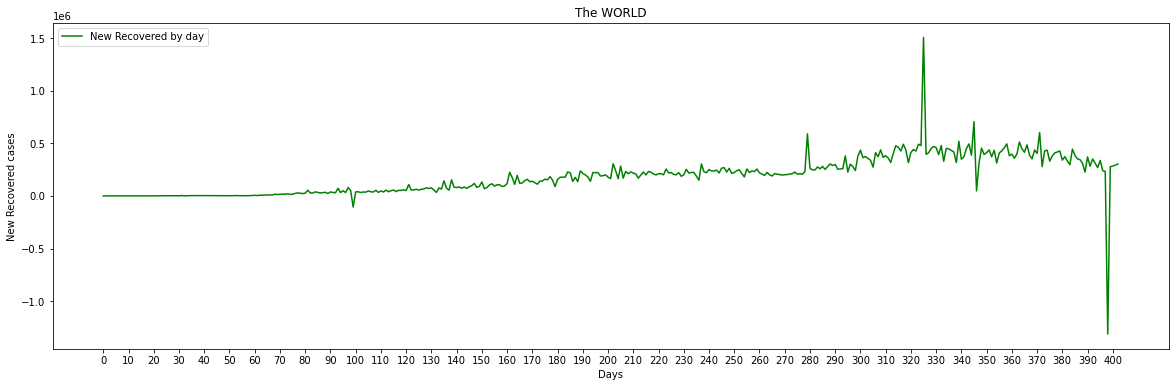

In [16]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("The WORLD")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAY 98

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  65.861
Highest Ratio until now (%):  69.758


('Total Recovered until now: ', 74939585.0)

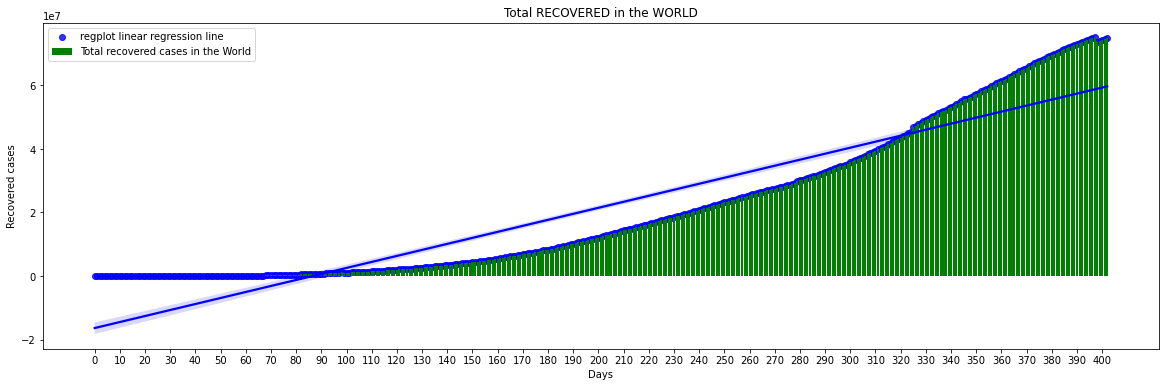

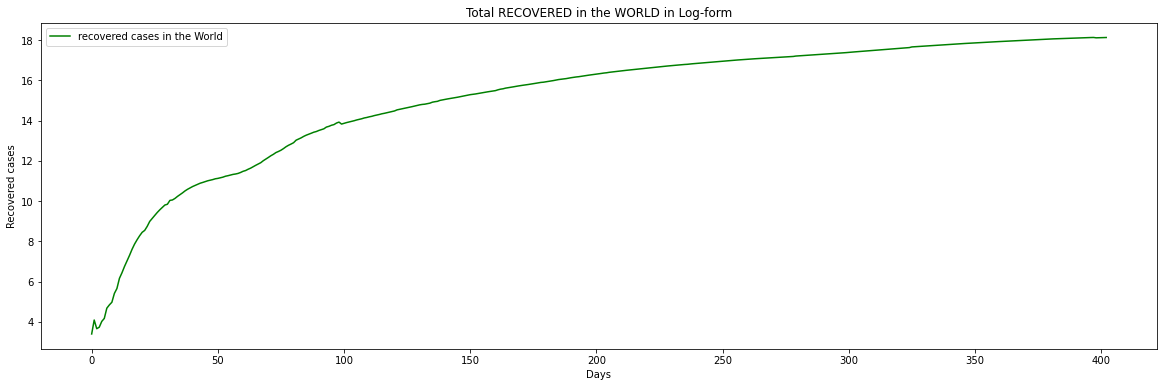

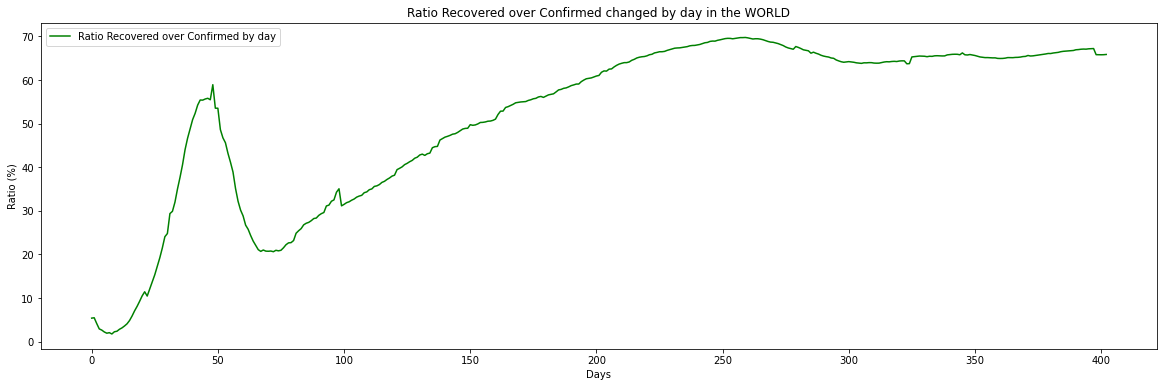

In [6]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
398,95332.0,2221972.0,2347866.0,79050.0,401653.0,10487496.0,22892.0,50945.0,11457.0,805428.0,1760.0,712328.0
399,95462.0,2231073.0,2362465.0,79487.0,403225.0,10554761.0,22897.0,51064.0,11474.0,808449.0,1804.0,717695.0
400,95518.0,2232050.0,2375318.0,79880.0,405101.0,10611732.0,22900.0,51290.0,11504.0,811551.0,1804.0,722308.0
401,95561.0,2247173.0,2387032.0,80333.0,406428.0,10643188.0,22902.0,51487.0,11579.0,814559.0,1839.0,725727.0


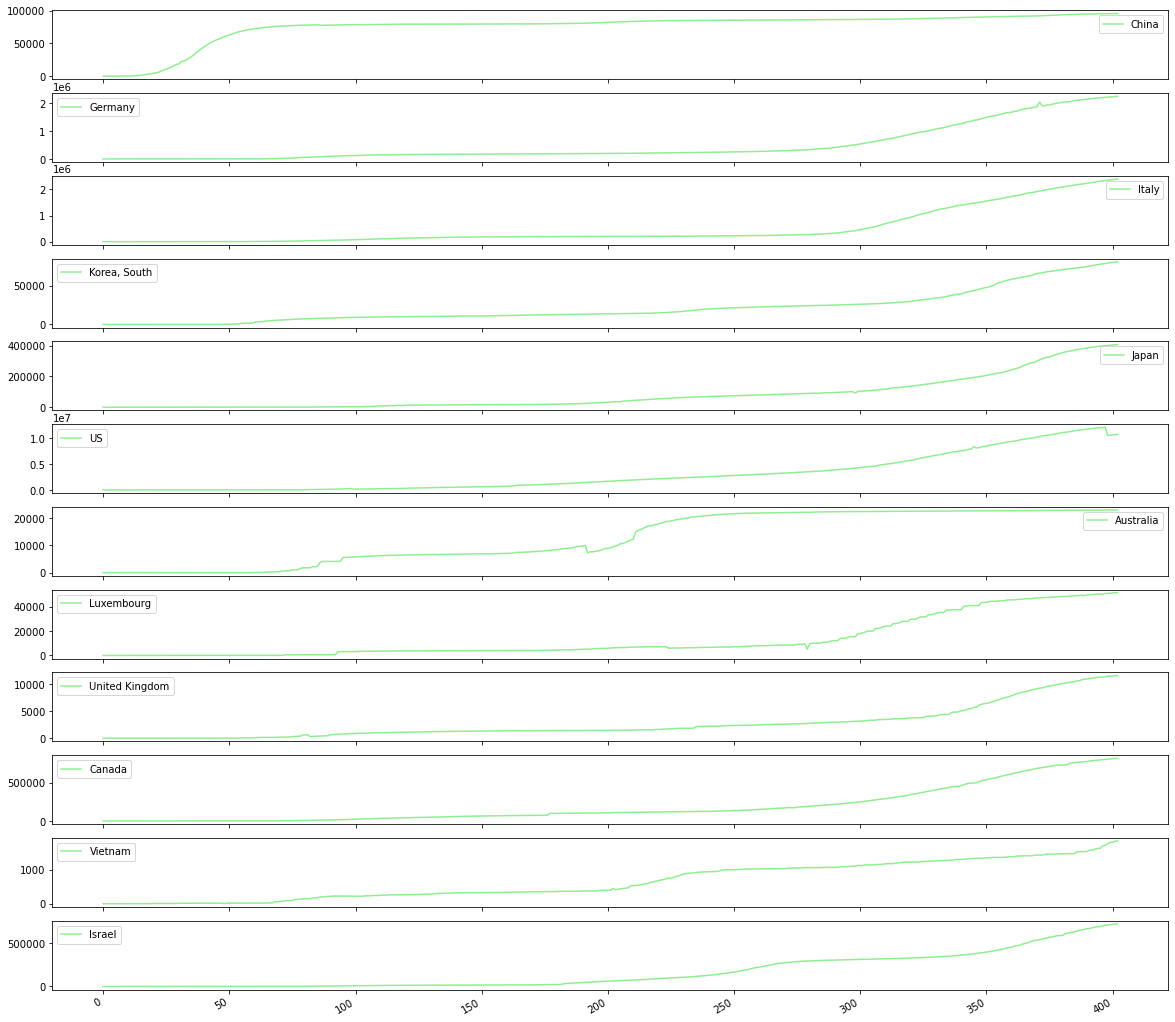

In [7]:
from pandas import Grouper
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel']
rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='lightgreen')
countries_recovered[countries]

,China,Germany,Italy,"Korea, South",Japan,US,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
Last day Increasing,44.0,5797.0,11320.0,364.0,1436.0,53112.0,1.0,0.0,23.0,2413.0,5.0,1849.0
Total Recovered,95605.0,2252970.0,2398352.0,80697.0,407864.0,10696300.0,22903.0,51487.0,11602.0,816972.0,1844.0,727576.0
Highest Number,3994.0,161840.0,39266.0,2143.0,10998.0,425878.0,2606.0,4523.0,350.0,23848.0,75.0,18322.0


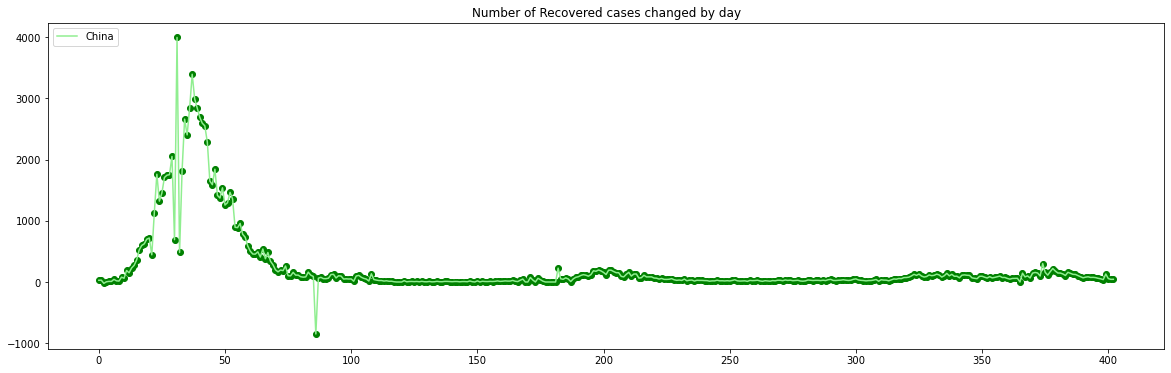

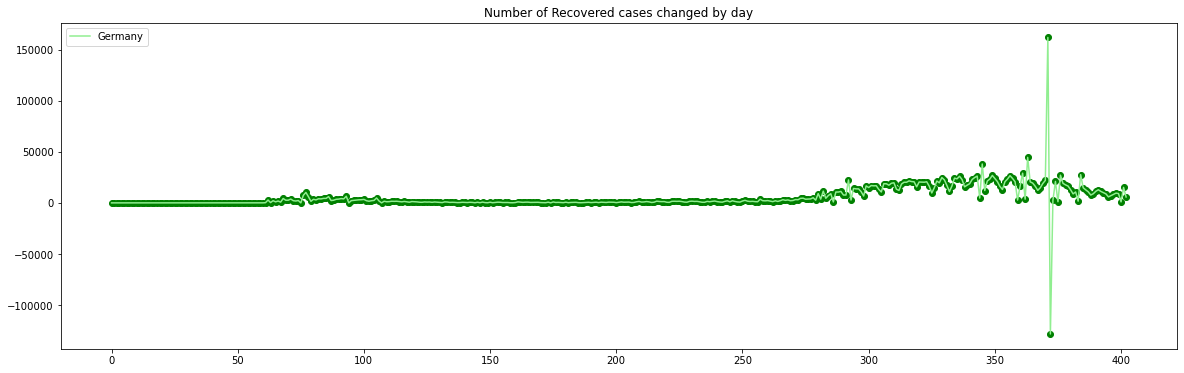

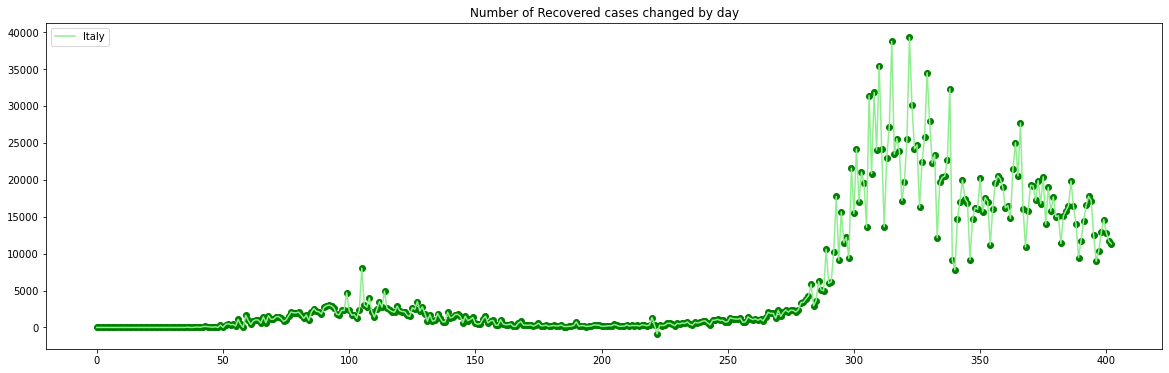

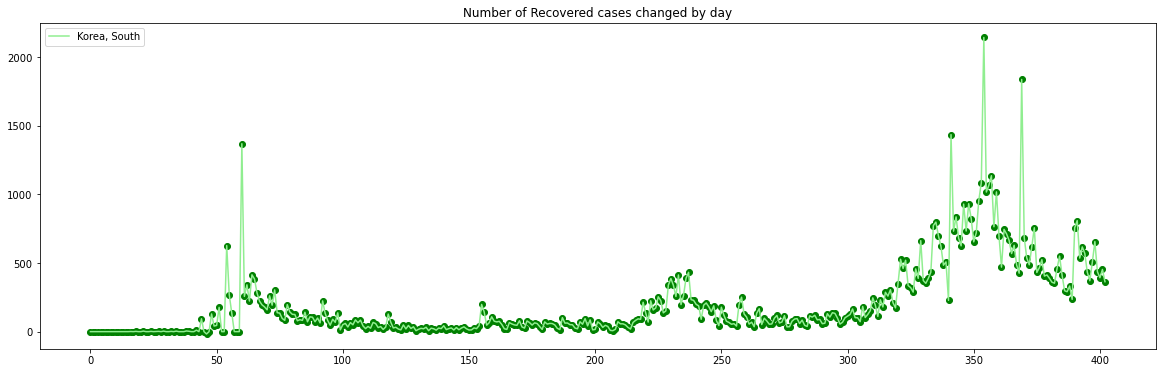

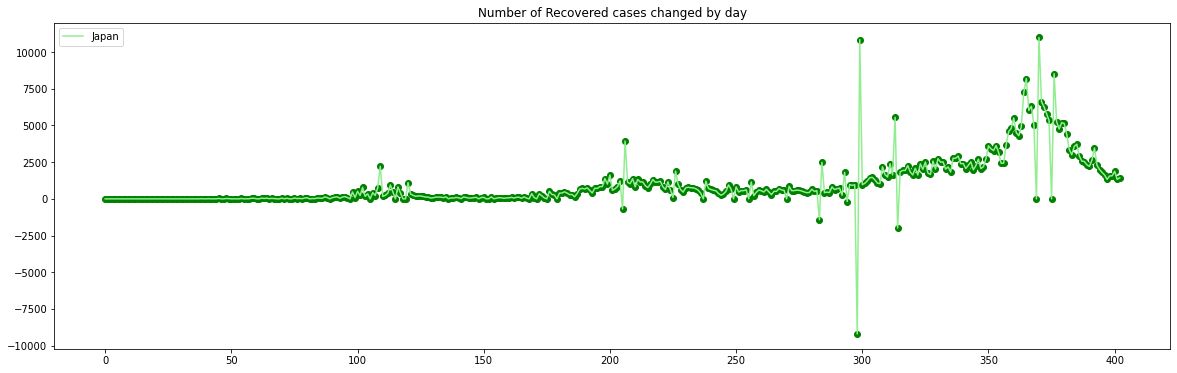

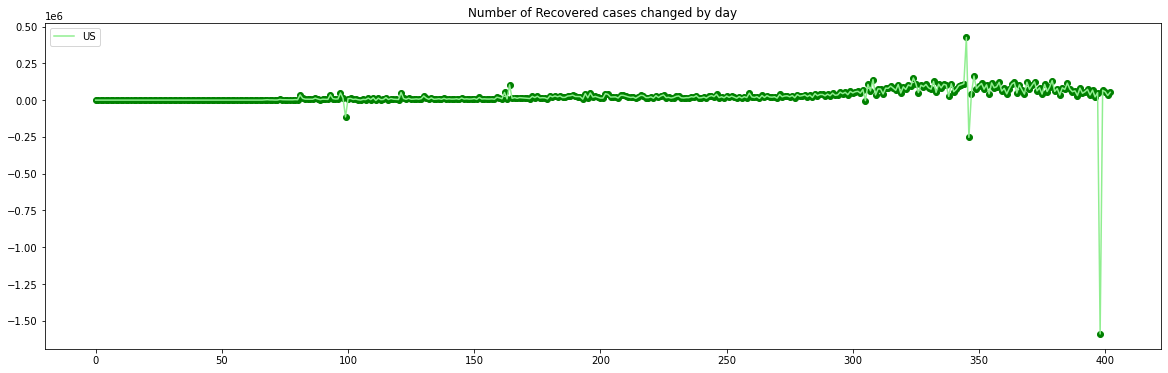

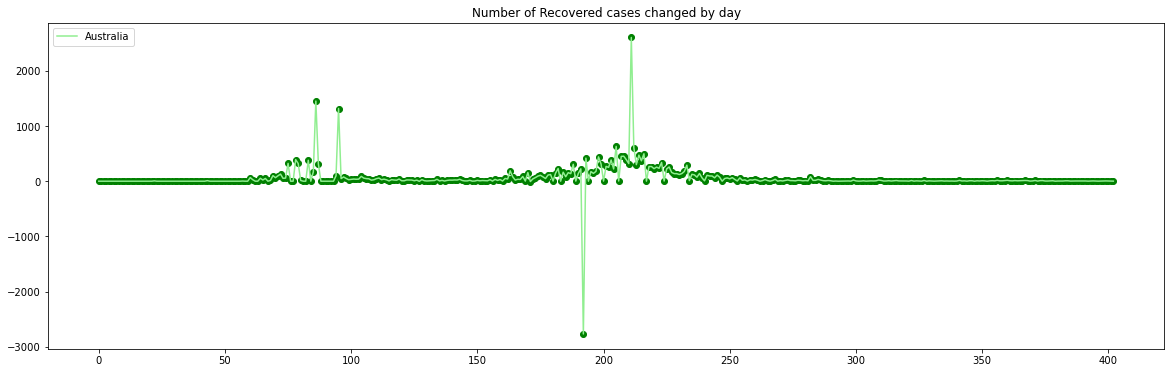

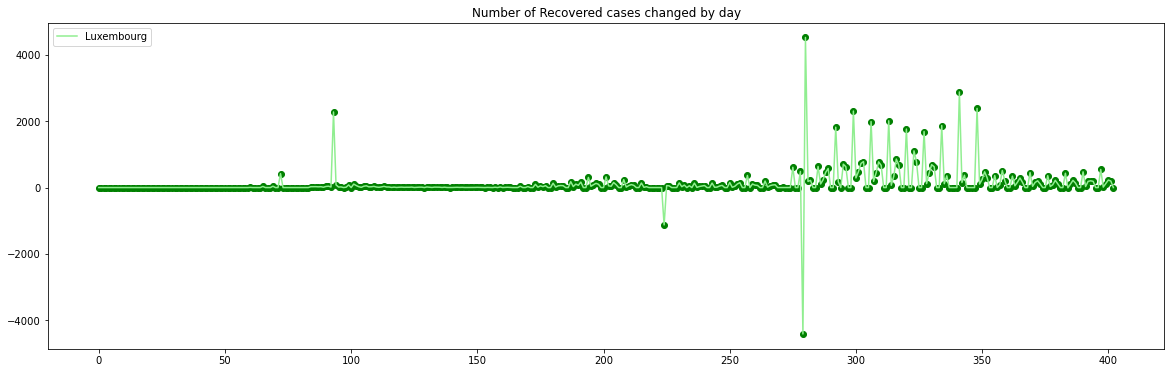

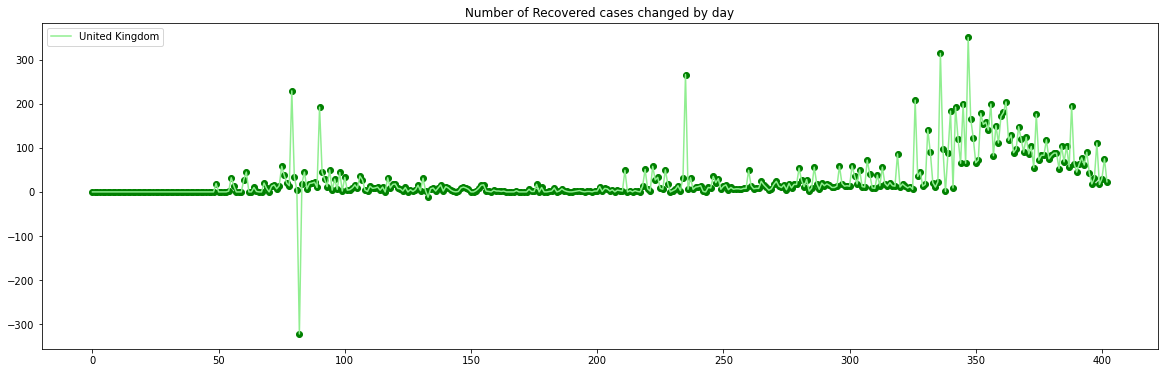

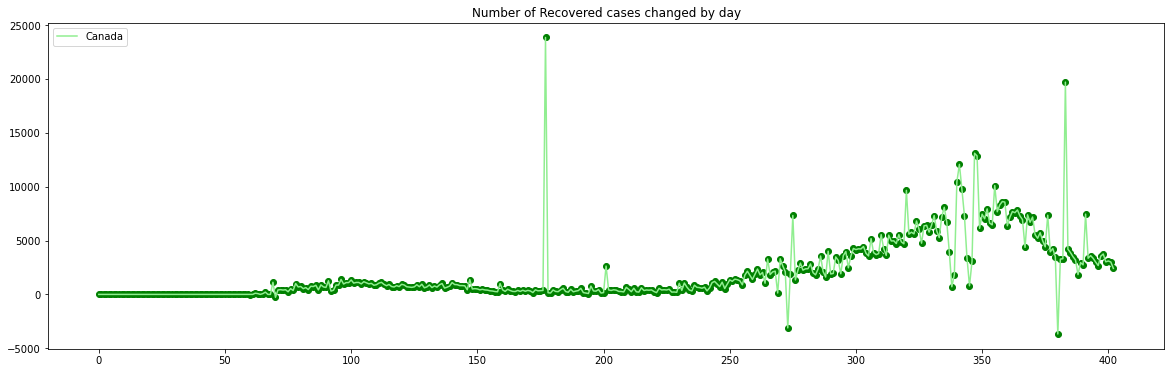

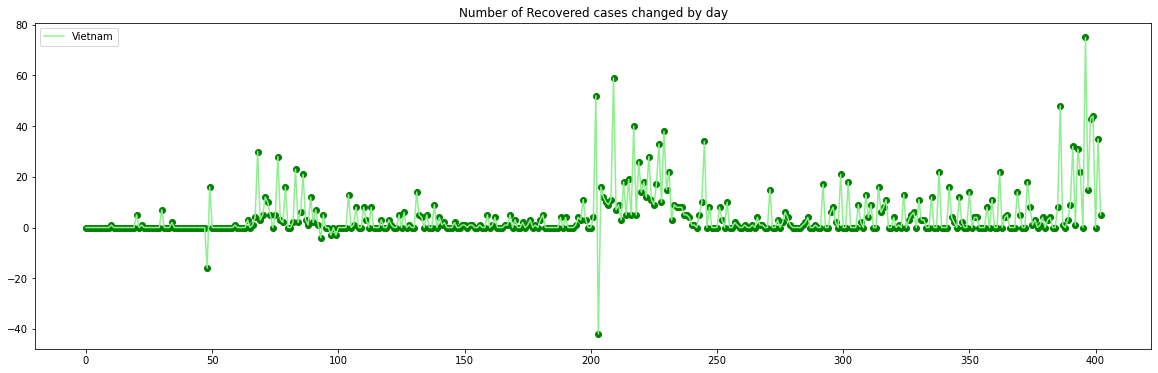

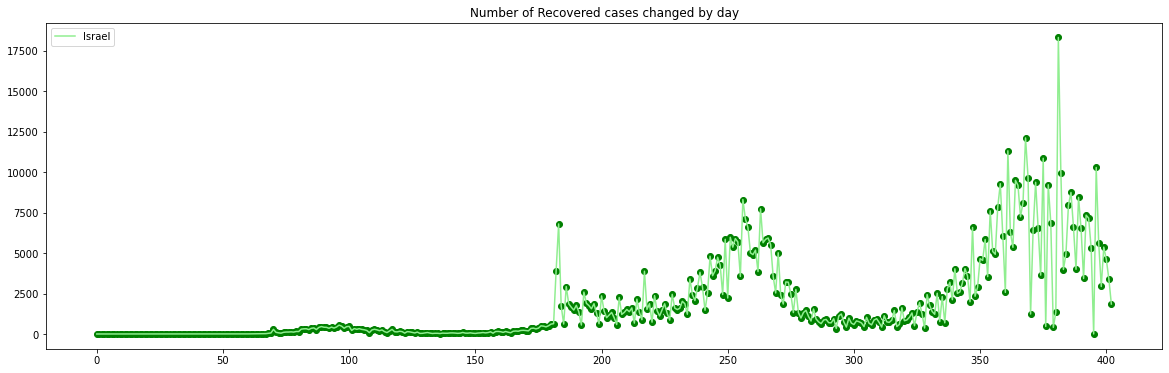

In [8]:
countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered', 'Highest Number'])

for country in countries:
    countriesdf[country] = [all_countries['Recovered'][country][-1]-all_countries['Recovered'][country][-2], all_countries['Recovered'][country][-1], np.max(list(list(zip(*y_dat_recovered_ByDay[country]))[1]))]

figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    plt.plot(*zip(*y_dat_recovered_ByDay[country]), color='lightgreen', label=country)
    plt.scatter(*zip(*y_dat_recovered_ByDay[country]), color='green')
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found when you see the scattered plot shows the negative values (<0).